## DESCRIPTIVE DATA ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

df= pd.read_csv("data.csv",parse_dates=["InvoiceDate"]) 
df.head() ## first 5 contents of data (default)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.size ## data count of data set

4335272

In [6]:
df.shape ## number of rows and columns 

(541909, 8)

In [7]:
len(df.columns) 


8

In [8]:
df.dtypes ## data types of the columns

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
df.describe().T ## descriptive analysis of numerical values

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [10]:
df['Quantity'].median()

3.0

In [11]:
df['UnitPrice'].median() 

2.08

In [12]:
df['CustomerID'].median()

15152.0

In [13]:
df['Quantity'].var() 

47559.39140913822

In [14]:
df['UnitPrice'].var()

9362.469164424467

In [15]:
df['CustomerID'].var()

2936425.999544096

In [16]:
df['Quantity'].mode() 

0    1
dtype: int64

In [17]:
df['UnitPrice'].mode()

0    1.25
dtype: float64

In [18]:
df['CustomerID'].mode()

0    17841.0
dtype: float64

## DATA VISUALIZATION

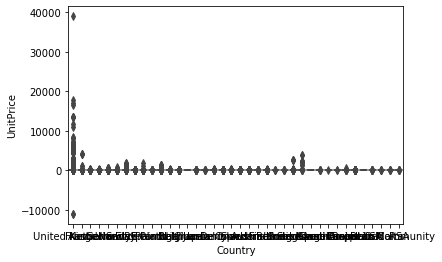

In [39]:
sns.boxplot(x="Country", y="UnitPrice", data=df); 


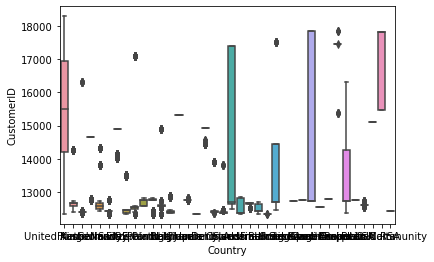

In [40]:
sns.boxplot(x="Country", y="CustomerID", data=df);

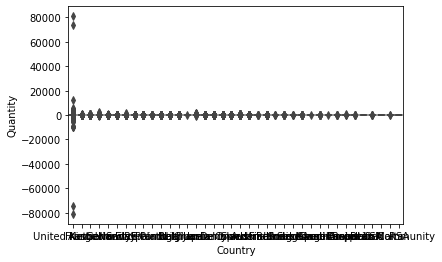

In [43]:
sns.boxplot(x="Country", y="Quantity", data=df);

In [22]:
country= df['Country'].unique() 
country.size 

38

In [23]:
country 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [24]:
country_num=df['Country'].value_counts() 
country_num

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

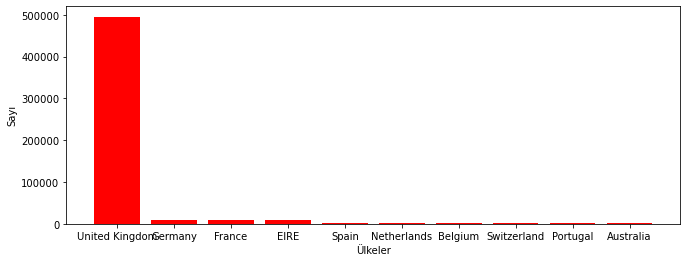

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(11,4)) 
plt.bar(country_num[:10].index,country_num[:10].values,color='red') 

plt.ylabel('Sayı') 
plt.xlabel('Ülkeler')
plt.show()

In [29]:
total_quantity=df.groupby('Country')['Quantity'].sum().sort_values(ascending =False)
total_quantity=total_quantity[:10] 
total_quantity

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

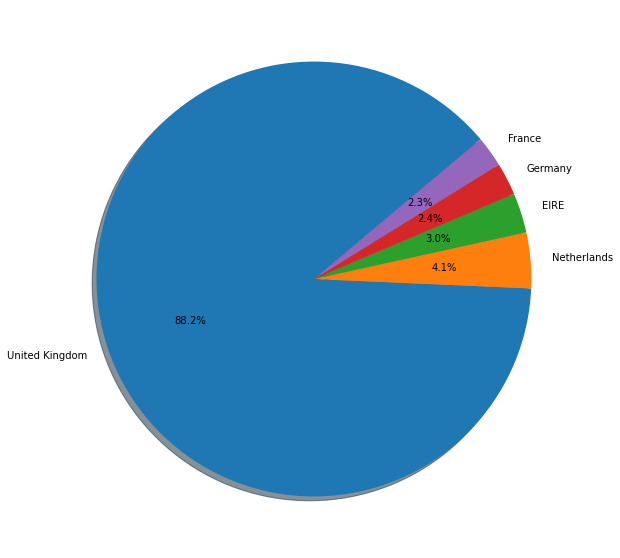

In [35]:
total_quantity=total_quantity[:5] 
plt.figure(figsize=(10,10))
plt.pie(total_quantity,startangle=40,autopct='%1.1f%%',shadow=True,labels=total_quantity.index)
plt.show()

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

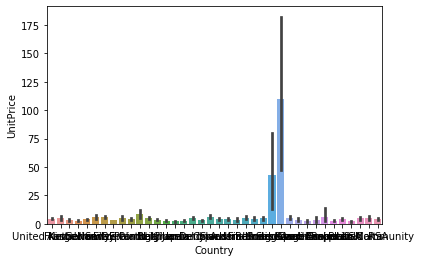

In [42]:
sns.barplot(x="Country", y="UnitPrice", data=df)


<AxesSubplot:xlabel='Country', ylabel='Quantity'>

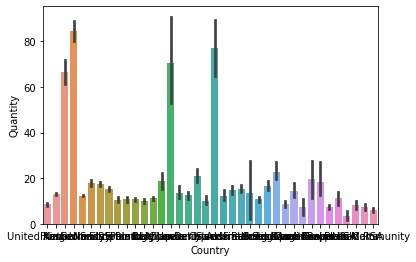

In [44]:
sns.barplot(x="Country", y="Quantity", data=df)

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

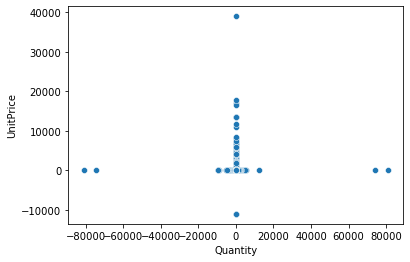

In [2]:
sns.scatterplot(x="Quantity", y="UnitPrice", data=df) ## “Correlation” 

## DATA PREPROCESSING

In [36]:
df.InvoiceNo.value_counts() 

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554647        1
553659        1
551736        1
C554153       1
554007        1
Name: InvoiceNo, Length: 25900, dtype: int64

In [37]:
df.InvoiceDate.value_counts() 

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-02-23 11:35:00       1
2011-09-22 14:01:00       1
2011-11-30 14:34:00       1
2011-03-30 17:20:00       1
2011-06-06 11:22:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

## Missing Data Completion

In [4]:
df.isnull().sum() ## number of missing data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.notnull().sum() 

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
df.isnull().sum() / df.shape[0] * 100 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
df1= df.dropna() ## Deletes records with missing data on a row basis
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df2= df.dropna(axis=1) ## Deletes records with missing data on a column basis
df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,France


In [10]:
df["Description"].fillna(df["Description"].mode()[0]) ## Missing data is completed by the mode of "Description".

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [12]:
df["Description"].mode()[0] 

'WHITE HANGING HEART T-LIGHT HOLDER'

In [13]:
df["CustomerID"].fillna(df["CustomerID"].mean()) ##  completed with the average of "CustomerID"

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [1]:
from sklearn.impute import SimpleImputer 

In [4]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
df.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country"], axis=1, inplace=True) 


In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') ## 3 strategies ; mean, median, most_frequent 
imputer.fit(df)

SimpleImputer(strategy='most_frequent')

In [8]:
df4= imputer.transform(df) 
df4

array([[6.000e+00, 2.550e+00, 1.785e+04],
       [6.000e+00, 3.390e+00, 1.785e+04],
       [8.000e+00, 2.750e+00, 1.785e+04],
       ...,
       [4.000e+00, 4.150e+00, 1.268e+04],
       [4.000e+00, 4.150e+00, 1.268e+04],
       [3.000e+00, 4.950e+00, 1.268e+04]])

In [9]:
type(df4) 

numpy.ndarray

In [10]:
df4 = pd.DataFrame(imputer.transform(df), columns=["Quantity","UnitPrice","CustomerID"])
df4

,Quantity,UnitPrice,CustomerID
0,6.0,2.55,17850.0
1,6.0,3.39,17850.0
2,8.0,2.75,17850.0
3,6.0,3.39,17850.0
4,6.0,3.39,17850.0
...,...,...,...
541904,12.0,0.85,12680.0
541905,6.0,2.10,12680.0
541906,4.0,4.15,12680.0
541907,4.0,4.15,12680.0


In [11]:
df4.isnull().sum()

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

## OUTLIERS OF THE DATA SET

<AxesSubplot:xlabel='Quantity'>

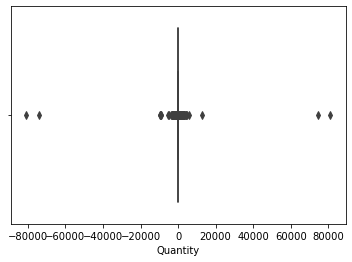

In [12]:
df_table = df["Quantity"].copy()
sns.boxplot(x=df_table)

In [13]:
Q1 = df_table.quantile(0.25)
Q2 = df_table.quantile(0.5) ## median 
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1    
low_bound = Q1-1.5 * IQR ## lower limit
upp_bound = Q3+1.5 * IQR ## upper limit
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
print("Alt Sınır Değeri : " + str(low_bound))
print("Üst Sınır Değeri : " + str(upp_bound)) 

1. Çeyrek : 1.0
2. Çeyrek : 3.0
3. Çeyrek : 10.0
Alt Sınır Değeri : -12.5
Üst Sınır Değeri : 23.5


In [15]:
outliers = (df_table < (low_bound)) | (df_table > (upp_bound) )
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 541909, dtype: bool

In [16]:
clean_df_table = df_table[~((df_table<(low_bound)) | (df_table > (upp_bound)))] 
clean_df_table

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 483290, dtype: int64

In [17]:
clean_df_table.shape 

(483290,)

## Smoothing

In [18]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [19]:
df_reshape = df.UnitPrice.values.reshape(-1,1)
df_reshape

array([[2.55],
       [3.39],
       [2.75],
       ...,
       [4.15],
       [4.15],
       [4.95]])

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
Xbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')


In [22]:
Xbin

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [24]:
Xbin.fit(df_reshape)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [26]:
Xbin.transform(df_reshape)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## Data Transformation

In [1]:
from sklearn import preprocessing

In [5]:
df["Quantity_scale"]=preprocessing.scale(df.Quantity)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_scale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,-0.016289
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016289
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,-0.007118
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016289
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016289
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0.011224
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,-0.016289
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,-0.025460
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,-0.025460


In [6]:
X = df["UnitPrice"].values.reshape(-1,1)
MinMax=preprocessing.MinMaxScaler(feature_range=(0,10)) 
MinMax.fit_transform(X).T

array([[2.21150398, 2.21167188, 2.21154396, ..., 2.21182378, 2.21182378,
        2.21198368]])

## Sampling

In [7]:
df.sample() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_scale
128455,547334,21626,VINTAGE UNION JACK PENNANT,8,2011-03-22 11:43:00,1.95,15044.0,United Kingdom,-0.007118


In [8]:
df.sample(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_scale
32266,539050,21900,"KEY FOB , SHED",1,2010-12-15 16:21:00,0.65,12577.0,France,-0.039216
470661,576618,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,2,2011-11-15 17:00:00,4.13,NaN,United Kingdom,-0.034630
16334,537648,21231,SWEETHEART CERAMIC TRINKET BOX,12,2010-12-07 15:48:00,1.25,12839.0,United Kingdom,0.011224
121033,546729,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom,0.011224
160924,550470,20616,CHERRY BLOSSOM PASSPORT COVER,1,2011-04-18 13:49:00,1.63,NaN,United Kingdom,-0.039216


In [3]:
df.sample(10, replace=True, random_state=1, axis=0) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
128037,547249,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2011-03-22 09:27:00,5.79,NaN,United Kingdom
491755,578074,22142,CHRISTMAS CRAFT WHITE FAIRY,2,2011-11-22 16:06:00,1.45,17590.0,United Kingdom
470924,576618,23240,SET OF 4 KNICK KNACK TINS DOILY,1,2011-11-15 17:00:00,8.29,NaN,United Kingdom
491263,578067,22973,CHILDREN'S CIRCUS PARADE MUG,1,2011-11-22 15:43:00,3.29,NaN,United Kingdom
371403,569220,85099F,JUMBO BAG STRAWBERRY,1,2011-10-02 13:26:00,2.08,16007.0,United Kingdom
73349,542344,22736,RIBBON REEL MAKING SNOWMEN,1,2011-01-27 11:30:00,3.29,NaN,United Kingdom
117583,546392,22524,CHILDRENS GARDEN GLOVES BLUE,2,2011-03-11 14:15:00,1.25,14587.0,United Kingdom
21440,538079,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-09 14:27:00,1.69,17671.0,United Kingdom
229520,557063,20755,BLUE PAISLEY POCKET BOOK,6,2011-06-16 15:01:00,0.85,17368.0,United Kingdom
413825,572323,22154,ANGEL DECORATION 3 BUTTONS,48,2011-10-24 09:46:00,0.42,14312.0,United Kingdom
